In [1]:
import os 
os.getcwd()

'/home/hm0/Research/molecules/MD_CVAE/Celery/draft_prog'

In [2]:
import sys
sys.path.append('../')

In [3]:
from run_cvae import run_cvae

Using TensorFlow backend.


In [4]:
cvae = run_cvae(0, '../cvae_input/cvae_input.h5',epochs=20)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 52, 52, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 52, 52, 64)   640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 26, 26, 64)   36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 26, 26, 64)   36928       conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_4 (

In [6]:
cvae.model.save_weights('cvae_weights.h5')
cvae.embedder.save_weights('cvae_embed_weight.h5')
cvae.generator.save_weights('cvae_gen_weight.h5')

In [9]:
cvae.embedder.get_weights()[0][0][0]

array([[-0.06133869,  0.04677141, -0.12553203,  0.02335082,  0.08236946,
        -0.00741456, -0.05739824, -0.06586425, -0.07994449, -0.10096775,
        -0.08308741,  0.00636932, -0.0600819 , -0.07295503, -0.12628396,
        -0.1862631 ,  0.07821491, -0.09635647, -0.03891196, -0.03250474,
        -0.03238764,  0.03694029, -0.13300866, -0.11479512, -0.08219989,
        -0.01779164,  0.05870625,  0.02821205,  0.11138376,  0.0103907 ,
        -0.17073749, -0.13398682, -0.01415447, -0.01505888,  0.0208428 ,
        -0.12424   , -0.05473837, -0.08927358,  0.05417058, -0.06830905,
        -0.058304  , -0.01293135,  0.01919666, -0.06659626, -0.12483438,
        -0.08656804,  0.09375697,  0.05714263, -0.01566087, -0.06801756,
         0.08999737, -0.12659094, -0.0440579 ,  0.11004369, -0.08296151,
        -0.10675929, -0.0427228 , -0.04152861,  0.05424544, -0.05873816,
         0.11201042, -0.05635003,  0.04047384, -0.09823921]],
      dtype=float32)

In [10]:
cvae.model.get_weights()[0][0][0]

array([[-0.06133869,  0.04677141, -0.12553203,  0.02335082,  0.08236946,
        -0.00741456, -0.05739824, -0.06586425, -0.07994449, -0.10096775,
        -0.08308741,  0.00636932, -0.0600819 , -0.07295503, -0.12628396,
        -0.1862631 ,  0.07821491, -0.09635647, -0.03891196, -0.03250474,
        -0.03238764,  0.03694029, -0.13300866, -0.11479512, -0.08219989,
        -0.01779164,  0.05870625,  0.02821205,  0.11138376,  0.0103907 ,
        -0.17073749, -0.13398682, -0.01415447, -0.01505888,  0.0208428 ,
        -0.12424   , -0.05473837, -0.08927358,  0.05417058, -0.06830905,
        -0.058304  , -0.01293135,  0.01919666, -0.06659626, -0.12483438,
        -0.08656804,  0.09375697,  0.05714263, -0.01566087, -0.06801756,
         0.08999737, -0.12659094, -0.0440579 ,  0.11004369, -0.08296151,
        -0.10675929, -0.0427228 , -0.04152861,  0.05424544, -0.05873816,
         0.11201042, -0.05635003,  0.04047384, -0.09823921]],
      dtype=float32)

In [11]:
import numpy as np
import h5py

In [12]:
cm_h5 = h5py.File('../cvae_input/cvae_input.h5', 'r', libver='latest', swmr=True)
cm_data = cm_h5[u'contact_maps']

In [13]:
cm_data.shape

(25220, 52, 52, 1)

In [15]:
embed_res = cvae.return_embeddings(cm_data)

In [16]:
import matplotlib.pyplot as plt 

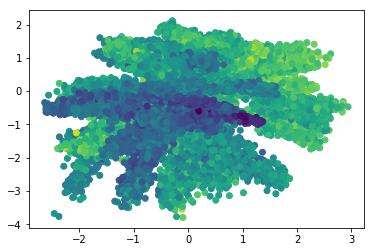

In [17]:
color = [np.sum(cm) for cm in cm_data] 
plt.scatter(embed_res[:,0], embed_res[:,1], c=color)

In [18]:
from run_cvae import CVAE 

cvae2 = CVAE((52, 52, 1), 3) 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 52, 52, 1)    0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 52, 52, 64)   640         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 26, 26, 64)   36928       conv2d_5[0][0]                   
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 26, 26, 64)   36928       conv2d_6[0][0]                   
__________________________________________________________________________________________________
conv2d_8 (

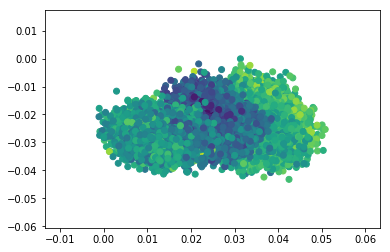

In [20]:
embed_res2 = cvae2.return_embeddings(cm_data)

plt.scatter(embed_res2[:,0], embed_res2[:,1], c=color)

In [21]:
# cvae2.graph.load_weights('cvae.h5')
cvae2.model.load_weights('./cvae_weights.h5')

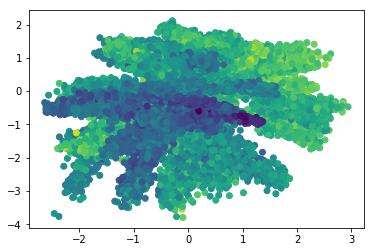

In [23]:
embed_res3 = cvae2.return_embeddings(cm_data)

plt.scatter(embed_res3[:,0], embed_res3[:,1], c=color)

In [42]:
cvae.encoder.embedder.save('embed.h5')

In [43]:
from keras.models import load_model

In [44]:
cvae3 = load_model('embed.h5')

/home/hm0/anaconda2/lib/python2.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


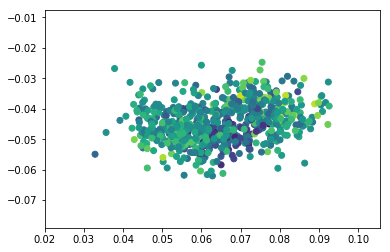

In [45]:
embed_res2 = cvae3.predict(cm_data)

plt.scatter(embed_res2[:,0], embed_res2[:,1], c=color)